# Clusterización
## Usando KMeans

## Caso de uso: La viviendas de California

Utilizar los parámetros de la ubicación ("**Latitud**" y  "**Longitud**") y el ingreso medio ('**MedInc**')  de algunas habitaciones en el estado de California para generar una agrupación (**clustering**) mediante el algoritmo de **K-Means**. 

En este ejemplo, se obtendrán grupos para crear segmentos económicos en diferentes regiones de California.

## Importación de las bibliotecas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # Para graficar
from sklearn.cluster import KMeans # Para ejecutar Kmean

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

# para generar el mapa
import plotly.express as px

# Para el escalado
from sklearn.preprocessing import MinMaxScaler

<ipython-input-1-85106b837e3c>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


## Extracción de datos

In [2]:
df = pd.read_csv("housing.csv")
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

## Preprocesamiento

### Selección de características

In [3]:
features = ["MedInc", "Latitude", "Longitude"]
X = df[features].copy()
X.head()

MedInc  Latitude  Longitude
0  8.3252     37.88    -122.23
1  8.3014     37.86    -122.22
2  7.2574     37.85    -122.24
3  5.6431     37.85    -122.25
4  3.8462     37.85    -122.25

### Escalado

Dado que la agrupación en clústeres de k-medias es sensible a la escala, puede ser una buena idea reescalar o normalizar los datos con valores extremos.


In [4]:
# para tener los features bajo la misma escala de valores
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Aplicación de clusterización

In [5]:
# Crear el modelo de clusterización
kmeans = KMeans(n_clusters=6, n_init='auto')

# Entrenamiendo y predicción del grupo
# Creación de columna 'cluster' para tener el número de grupo
df["Cluster"] = kmeans.fit_predict(X)

# Definir la columna 'cluster' como tipo de dato categórico
df["Cluster"] = df["Cluster"].astype("category")

# Visualización

In [6]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal Cluster  
0    -122.23        4.526       1  
1    -122.22        3.585       1  
2    -122.24        3.521       1  
3    -122.25        3.413       1  
4    -122.25        3.422       5

Ahora veamos un par de tramas para ver qué tan efectivo fue esto. Primero, un diagrama de dispersión que muestra la distribución geográfica de los clústeres. Parece que el algoritmo ha creado segmentos separados para las áreas de mayores ingresos en las costas.



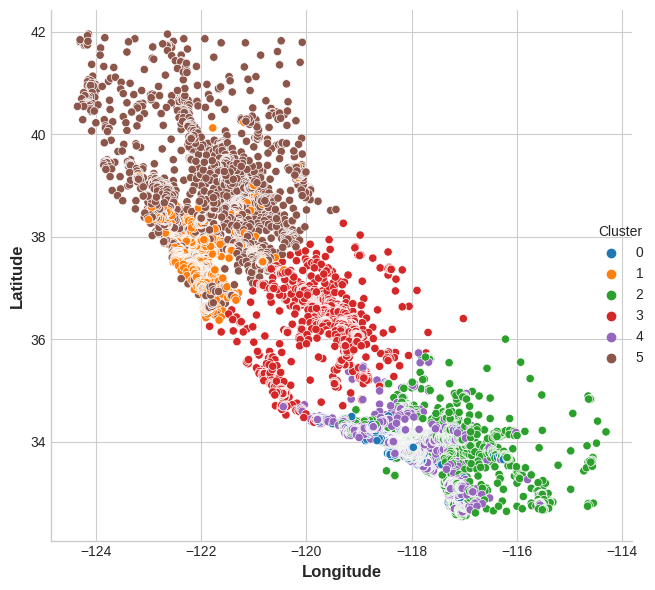

In [7]:
sns.relplot(
    x="Longitude", y="Latitude", hue="Cluster", data=df, height=6,
);

In [8]:
# basado en https://plotly.com/python/mapbox-layers/

fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", hover_name="MedInc", color="Cluster", hover_data=["Cluster", "MedHouseVal"],
                        zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

El objetivo de este conjunto de datos es MedHouseVal (valor medio de la vivienda). Estos diagramas de caja muestran la distribución del objetivo dentro de cada clúster. Si la agrupación es informativa, estas distribuciones deberían, en su mayor parte, separarse en MedHouseVal, que es de hecho lo que vemos.

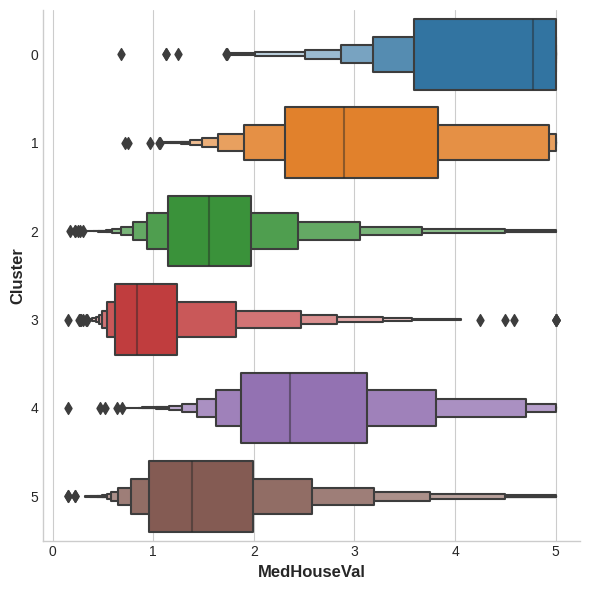

In [9]:
sns.catplot(x="MedHouseVal", y="Cluster", data=df, kind="boxen", height=6);

In [10]:
df["MedInc_categorias"], MedInc_categorias_bines = pd.cut(df["MedInc"], 3, labels=["bajo", "medio", "alto"], retbins=True)
df["MedHouseVal_categorias"], MedHouseVal_categorias_bines = pd.cut(df["MedHouseVal"], 3, labels=["bajo", "medio", "alto"], retbins=True)

In [11]:
# Como se contruyeron los intevalos de MedInc_categorias_bines
print('MedInc_categorias_bines')
print(MedInc_categorias_bines)

# Como se contruyeron los intevalos de MedHouseVal_categorias_bines
print('MedHouseVal_categorias_bines')
print(MedHouseVal_categorias_bines)

MedInc_categorias_bines
[ 0.4853998  5.3333    10.1667    15.0001   ]
MedHouseVal_categorias_bines
[0.14513998 1.76666333 3.38333667 5.00001   ]


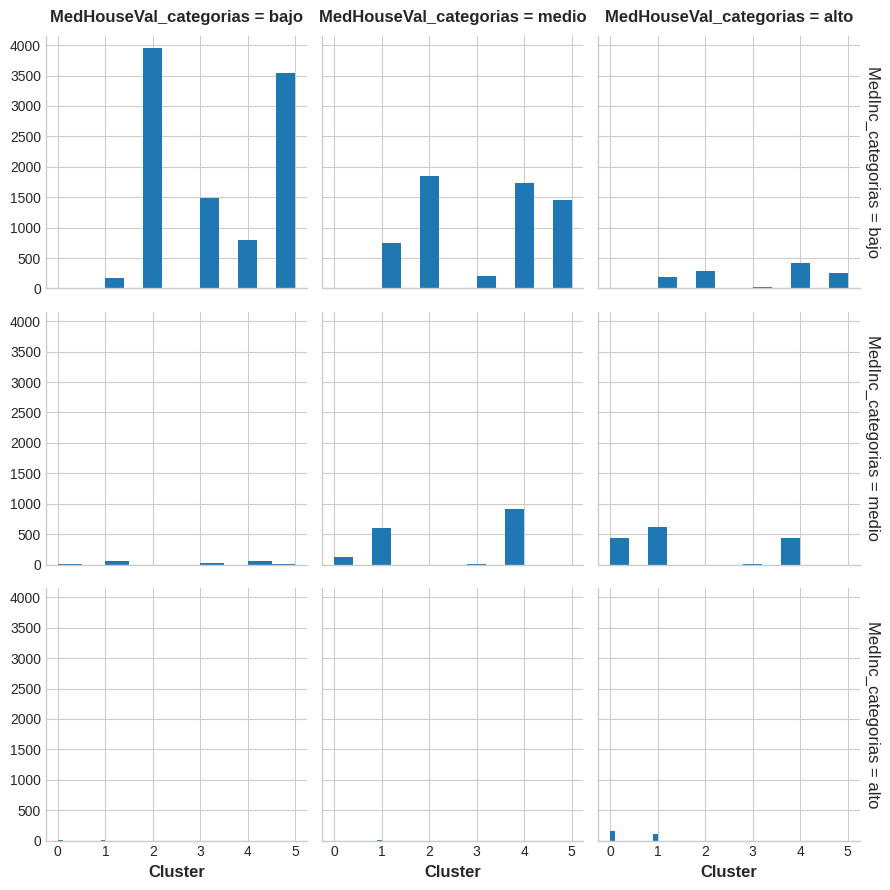

In [12]:
grid = sns.FacetGrid(df, row="MedInc_categorias", col="MedHouseVal_categorias", margin_titles=True)
grid.map(plt.hist, "Cluster");

In [13]:
# cuando registros por tipo de cluster
df["Cluster"].value_counts()

2    6091
5    5251
4    4339
1    2500
3    1733
0     726
Name: Cluster, dtype: int64

In [14]:
df.groupby(["MedInc_categorias", "MedHouseVal_categorias"])["Cluster"].value_counts()

MedInc_categorias  MedHouseVal_categorias  Cluster
bajo               bajo                    2          3955
                                           5          3540
                                           3          1488
                                           4           790
                                           1           172
                                           0             0
                   medio                   2          1854
                                           4          1730
                                           5          1448
                                           1           755
                                           3           199
                                           0             0
                   alto                    4           425
                                           2           282
                                           5           262
                                           1           191
     